# Meha Ahmed homework 4

In [21]:
import pandas as pd

import numpy as np

import plotly.express as px

import plotly.graph_objects as go

import sqlite3 as sq3

url = "https://raw.githubusercontent.com/bcaffo/MRIcloudT1volumetrics/master/inst/extdata/multilevel_lookup_table.txt"

multilevel_lookup = pd.read_csv(url, sep = "\t").drop(['Level5'], axis = 1)

multilevel_lookup = multilevel_lookup.rename(columns = {

    "modify"   : "roi",

    "modify.1" : "level4",

    "modify.2" : "level3",

    "modify.3" : "level2",

    "modify.4" : "level1"})

multilevel_lookup = multilevel_lookup[['roi', 'level4', 'level3', 'level2', 'level1']]

In [13]:
id = 127
subjectData = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
subjectData = subjectData.loc[(subjectData.type == 1) & (subjectData.level == 5) & (subjectData.id == id)]
subjectData = subjectData[['roi', 'volume']]
subjectData = pd.merge(subjectData, multilevel_lookup, on = "roi")
subjectData = subjectData.assign(icv = "ICV")
subjectData = subjectData.assign(comp = subjectData.volume / np.sum(subjectData.volume))

In [14]:
summary = subjectData[["icv", "level1", "level2"]].groupby(["icv", "level1", "level2"], as_index = False).mean()
summaryvol1 = subjectData[["icv", "level1", "volume"]].groupby(["icv", "level1"], as_index = False).sum()
summaryvol2 = subjectData[["icv", "level1", "level2", "volume"]].groupby(["icv", "level1", "level2"], as_index = False).sum()
unique_summary = pd.unique(summary.values.ravel())
unique_summary = unique_summary.tolist()

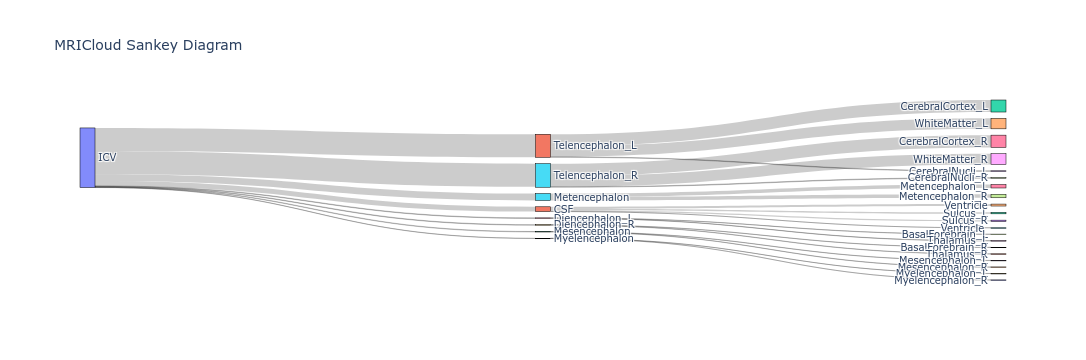

In [16]:
fig = go.Figure(data=[go.Sankey(
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  unique_summary
    ),
    # Add links
    link = dict(
      source =  [0, 1, 1, 1, 1, 0, 6, 6, 0, 9, 9, 0, 12, 12, 0, 15, 15, 0, 18, 18, 0, 21, 21, 21, 0, 25, 25, 25],
      target =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
      value =  [109787, 33975, 30018, 44979, 815, 11817, 5475, 6342, 11560, 5188, 6372, 10271, 4945, 5326, 159411, 79498, 79913, 4975, 2403, 2572, 531153, 276982, 12381, 241790, 534444, 282874, 13077, 247493],
      label =  unique_summary
))])
fig.update_layout(title_text="MRICloud Sankey Diagram", font_size=10)
fig.show()
fig.write_html("hw4Sankey.html")

Link with HTML file: https://mahmed45-prog.github.io/mehaahmed_datasciencehw4/hw4Sankey.html

In [25]:
con = sq3.connect("opioid.db")

population = pd.read_sql_query("SELECT * from population", con)
annual = pd.read_sql_query("SELECT * from annual", con)
land = pd.read_sql_query("SELECT * from land", con)

# you have to close the connection
con.close

<function Connection.close>

In [39]:
annual.head(4)

annual.loc[annual.countyfips == "NA"]

annual.loc[(annual.countyfips == "NA") & (annual.BUYER_STATE != "PR")]

,,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
10071,10072,GUAM,GU,2006,319,265348,NA
10072,10073,GUAM,GU,2007,330,275600,NA
10073,10074,GUAM,GU,2008,313,286900,NA
10074,10075,GUAM,GU,2009,390,355300,NA
10075,10076,GUAM,GU,2010,510,413800,NA
...,...,...,...,...,...,...,...
27751,27752,NA,MA,2006,247,114900,NA
27752,27753,NA,NV,2006,380,173600,NA
27753,27754,NA,NV,2007,447,200600,NA
27754,27755,NA,NV,2008,5,2200,NA


In [52]:
annual.loc[(annual.BUYER_STATE == "AR") & (annual.BUYER_COUNTY == "MONTGOMERY"), "countyfips"] = 5097
annual.loc[(annual.BUYER_STATE == "AR") & (annual.BUYER_COUNTY == "MONTGOMERY")]

,,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,17430,MONTGOMERY,AR,2006,469,175390,5097
17430,17431,MONTGOMERY,AR,2007,597,241270,5097
17431,17432,MONTGOMERY,AR,2008,561,251760,5097
17432,17433,MONTGOMERY,AR,2009,554,244160,5097
17433,17434,MONTGOMERY,AR,2010,449,247990,5097
17434,17435,MONTGOMERY,AR,2011,560,313800,5097
17435,17436,MONTGOMERY,AR,2012,696,339520,5097
17436,17437,MONTGOMERY,AR,2013,703,382300,5097
17437,17438,MONTGOMERY,AR,2014,491,396900,5097


In [70]:
annual = annual.loc[annual.BUYER_COUNTY != "NA"]

land_area = land[["Areaname", "STCOU", "LND110210D"]]
land_area = land_area.rename(columns={"STCOU":"countyfips"})

In [73]:
county_info =pd.merge(population,land_area, how='left')

#df3 is a new merged dataframe
#df1 and df2 are two dataframes to be merged
county_info.head()

,,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
0,1,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328,"Autauga, AL",594.44
1,2,BALDWIN,AL,01003,1,3,Baldwin,"Baldwin County, Alabama",B01003_001,2006,168121,"Baldwin, AL",1589.78
2,3,BARBOUR,AL,01005,1,5,Barbour,"Barbour County, Alabama",B01003_001,2006,27861,"Barbour, AL",884.88
3,4,BIBB,AL,01007,1,7,Bibb,"Bibb County, Alabama",B01003_001,2006,22099,"Bibb, AL",622.58
4,5,BLOUNT,AL,01009,1,9,Blount,"Blount County, Alabama",B01003_001,2006,55485,"Blount, AL",644.78


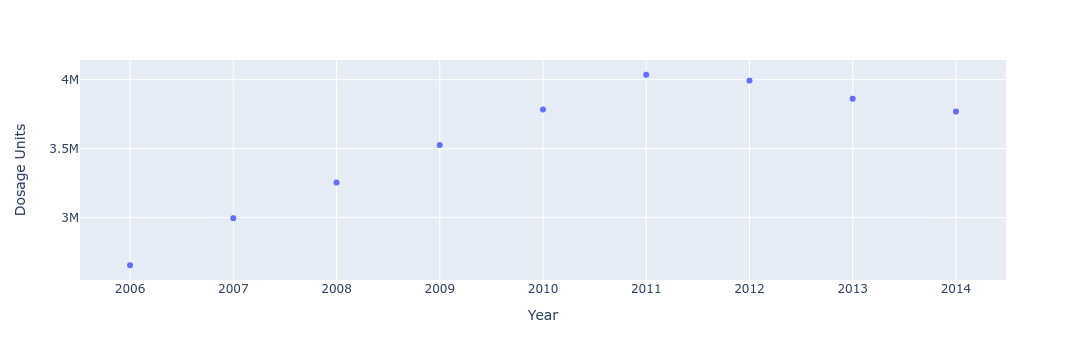

In [92]:
annual_avg = annual[["year","DOSAGE_UNIT"]].apply(pd.to_numeric)
annual_avg = annual_avg.groupby(["year"], as_index = False).mean()
annual_avg.head()

fig2 = px.scatter(x=annual_avg.year, y=annual_avg.DOSAGE_UNIT, labels={"x":"Year","y":"Dosage Units"})
fig2.show()
fig2.write_html("hw4Scatter.html")

Link with HTML file:https://mahmed45-prog.github.io/mehaahmed_datasciencehw4/hw4Scatter.html